In [1]:
import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt


In [2]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 5
tf.random.set_seed(RANDOM_SEED)

In [3]:
# read the training and test data sets (source: Kaggle)
mnist_train = pd.read_csv('train.csv')
mnist_test = pd.read_csv('test.csv')

# check the pandas DataFrame object - MNIST train dataset
print('\nMNIST train DataFrame:')
print(mnist_train.info())

# check the pandas DataFrame object - MNIST train dataset
print('\nMNIST test DataFrame:')
print(mnist_test.info())


MNIST train DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None

MNIST test DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


In [4]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#check for missing data - training data 
np.sum(mnist_train.isna().sum())

0

In [7]:
#check for missing data - test data 
np.sum(mnist_test.isna().sum())

0

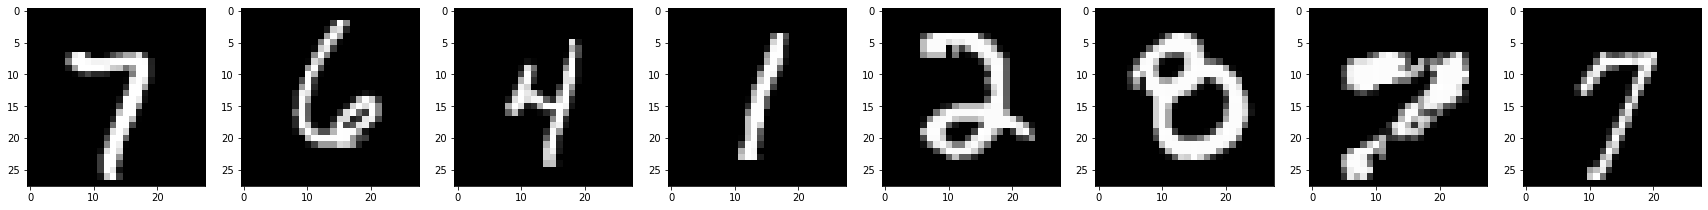

In [8]:
# Plot eight random digits in the training data set
plt.figure(figsize=(30,20))
for i in range(1,9):
    j=random.randint(0, 42000)
    plt.subplot(1,8,i)
    grid_data = mnist_train.iloc[j,1:785].values.reshape(28,28)
    plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()


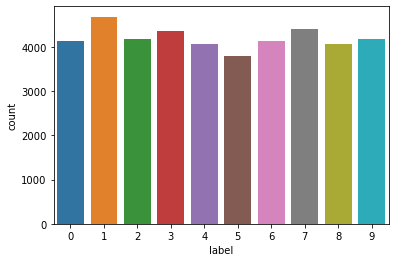

In [9]:
# count plots for the labels - training data set
sns.countplot(x = "label", data = mnist_train)

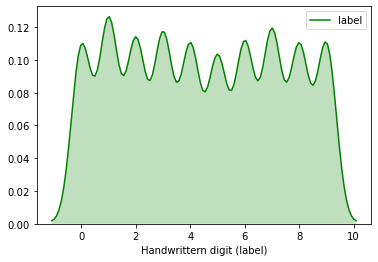

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
# create a kernel density plot
# KDE plot  
sns.kdeplot(mnist_train["label"], color = "green",  
            shade = True) 
plt.xlabel("Handwrittern digit (label)", fontsize=10)
plt.show() 
plt.figure() 

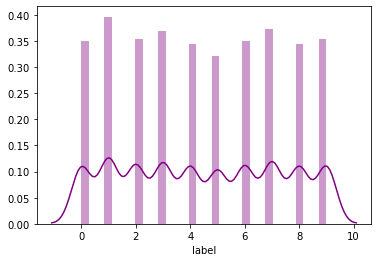

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
# Histogram+Density Plot  
sns.distplot(mnist_train["label"], color = "purple") 
plt.show() 
plt.figure()

In [12]:
# Prepare X_train_unscaled, y_train, and X_test_unscaled
# Note we do not have y_test
X_train_full = mnist_train.iloc[:,1:785]
y_train_full = mnist_train['label']
X_test_full = mnist_test

In [13]:
# Normalize the data 
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_full / 255.0

In [14]:
#Reshape the data for model training
X_train = X_train.values.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_valid = X_valid.values.reshape(X_valid.shape[0], 28, 28,1).astype('float32')

In [15]:
#Reshape the data for prediction
X_test = X_test.values.reshape(X_test.shape[0], 28, 28,1).astype('float32')

In [16]:
#Create a dataframe to store the model accuracy and scores
results_tbl = pd.DataFrame(columns=['model_name','Number of hidden layers (factor1)', 'Nodes per hidden layer (factor2)', 'Hidden activation function (factor3)','Processing Time','Training Set Accuracy','Validation Set Accuracy','Test Set Accuracy (Kaggle score)'])
results_tbl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   model_name                            0 non-null      object
 1   Number of hidden layers (factor1)     0 non-null      object
 2   Nodes per hidden layer (factor2)      0 non-null      object
 3   Hidden activation function (factor3)  0 non-null      object
 4   Processing Time                       0 non-null      object
 5   Training Set Accuracy                 0 non-null      object
 6   Validation Set Accuracy               0 non-null      object
 7   Test Set Accuracy (Kaggle score)      0 non-null      object
dtypes: object(8)
memory usage: 0.0+ bytes



# Two level factorial experiment design with three factors

# <font color="red">_Treatment 1_</font> 

## Number of hidden layers: 2
## Number of nodes per hidden layer: 300
## Hidden Activation function: ReLu

In [17]:
#classification MLP with two hidden layers, 300 nodes per layer, "relu" hidden layer activation
model_1 = keras.models.Sequential()
model_1.add(keras.layers.Flatten(input_shape=[28, 28]))
model_1.add(keras.layers.Dense(300, activation="relu"))
model_1.add(keras.layers.Dense(300, activation="relu"))
model_1.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_1.layers

In [20]:
model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [21]:
# Fit the model; obtain the model fit time
start=datetime.now()
history_1 = model_1.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))
end=datetime.now()
print(end-start)

Epoch 1/30
1157/1157 [==============================] - 2s 1ms/step - loss: 0.7509 - accuracy: 0.8144 - val_loss: 0.3723 - val_accuracy: 0.8956
Epoch 2/30
1157/1157 [==============================] - 1s 1ms/step - loss: 0.3302 - accuracy: 0.9065 - val_loss: 0.2977 - val_accuracy: 0.9140
Epoch 3/30
1157/1157 [==============================] - 1s 1ms/step - loss: 0.2752 - accuracy: 0.9216 - val_loss: 0.2674 - val_accuracy: 0.9220
Epoch 4/30
1157/1157 [==============================] - 1s 1ms/step - loss: 0.2414 - accuracy: 0.9315 - val_loss: 0.2314 - val_accuracy: 0.9340
Epoch 5/30
1157/1157 [==============================] - 2s 1ms/step - loss: 0.2154 - accuracy: 0.9391 - val_loss: 0.2266 - val_accuracy: 0.9350
Epoch 6/30
1157/1157 [==============================] - 1s 1ms/step - loss: 0.1938 - accuracy: 0.9448 - val_loss: 0.1939 - val_accuracy: 0.9458
Epoch 7/30
1157/1157 [==============================] - 1s 1ms/step - loss: 0.1760 - accuracy: 0.9501 - val_loss: 0.1851 - val_accuracy:

In [22]:
print ('Train Accuracy: ')
best_model_train_accuracy = np.round(history_1.history['accuracy'][np.argmin(history_1.history['loss'])],4)
best_model_train_accuracy

Train Accuracy: 


0.9903

In [23]:
print ('Validation Accuracy: ')
best_model_val_accuracy = np.round(history_1.history['val_accuracy'][np.argmin(history_1.history['val_loss'])],4)
best_model_val_accuracy

Validation Accuracy: 


0.9746

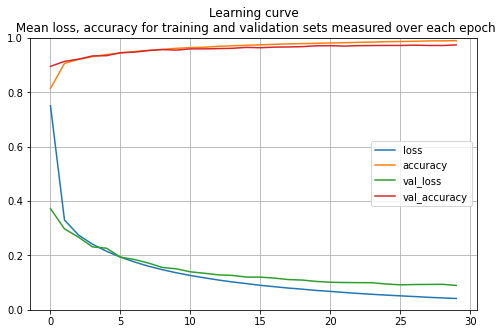

In [24]:
# Plot the learning curve
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning curve\n Mean loss, accuracy for training and validation sets measured over each epoch')
plt.show()

In [25]:
# obtain the predictions for X_test using the Neural Net #1 
test_pred_1 = np.argmax(model_1.predict(X_test), axis=-1)
test_pred_1

array([2, 0, 9, ..., 3, 9, 2])

In [26]:
# save the results to a csv
submission_df = pd.DataFrame({'ImageId':range(1,28001),'Label':test_pred_1})
submission_df.to_csv('submission_model_1.csv',index=False)

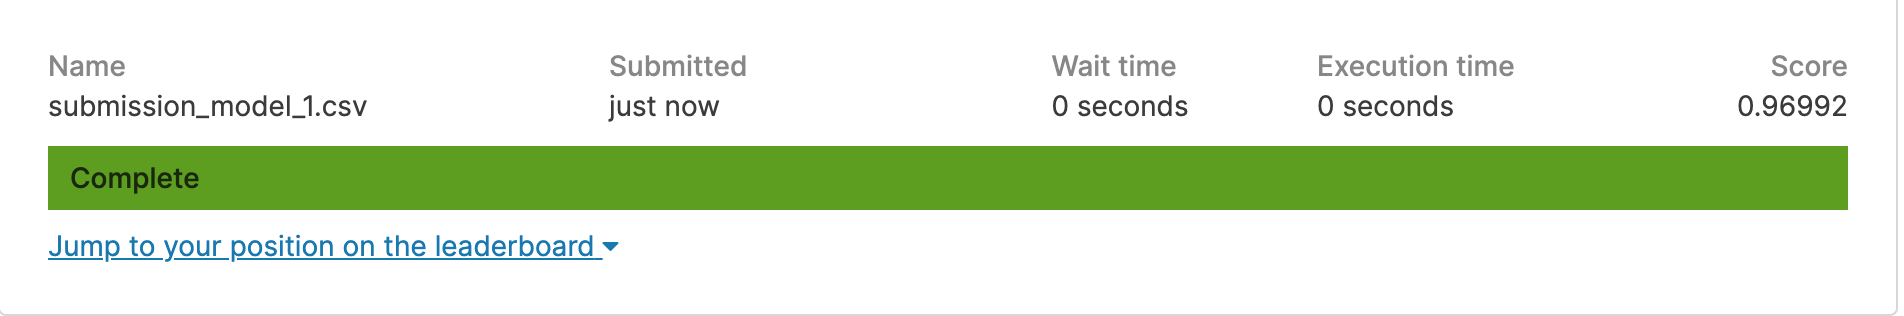

In [27]:
#Store the accuracy and kaggle score for this model 
results_tbl = results_tbl.append({'model_name':'Neural Net #1', 
                                   'Number of hidden layers (factor1)':'2',
                                   'Nodes per hidden layer (factor2)':'300',
                                   'Hidden activation function (factor3)':'relu',
                                   'Processing Time':(end-start),
                                   'Training Set Accuracy':best_model_train_accuracy,
                                   'Validation Set Accuracy':best_model_val_accuracy,
                                   'Test Set Accuracy (Kaggle score)': '0.96992'
                                   },ignore_index=True)
results_tbl

,model_name,Number of hidden layers (factor1),Nodes per hidden layer (factor2),Hidden activation function (factor3),Processing Time,Training Set Accuracy,Validation Set Accuracy,Test Set Accuracy (Kaggle score)
0,Neural Net #1,2,300,relu,00:00:45.475148,0.9903,0.9746,0.96992


# <font color="red">_Treatment 2_</font> 

## Number of hidden layers: 2
## Number of nodes per hidden layer: 500
## Hidden Activation function: ReLu

In [28]:
#classification MLP with two hidden layers, 500 nodes per layer, "relu" hidden layer activation
model_2 = keras.models.Sequential()
model_2.add(keras.layers.Flatten(input_shape=[28, 28]))
model_2.add(keras.layers.Dense(500, activation="relu"))
model_2.add(keras.layers.Dense(500, activation="relu"))
model_2.add(keras.layers.Dense(10, activation="softmax"))

In [29]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_2.layers

In [31]:
model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [32]:
# Fit the model; obtain the model fit time
start=datetime.now()
history_2 = model_2.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))
end=datetime.now()
print(end-start)

Epoch 1/30
1157/1157 [==============================] - 4s 3ms/step - loss: 0.7107 - accuracy: 0.8265 - val_loss: 0.3630 - val_accuracy: 0.9000
Epoch 2/30
1157/1157 [==============================] - 3s 3ms/step - loss: 0.3217 - accuracy: 0.9078 - val_loss: 0.2905 - val_accuracy: 0.9188
Epoch 3/30
1157/1157 [==============================] - 3s 3ms/step - loss: 0.2688 - accuracy: 0.9222 - val_loss: 0.2587 - val_accuracy: 0.9256
Epoch 4/30
1157/1157 [==============================] - 3s 3ms/step - loss: 0.2346 - accuracy: 0.9331 - val_loss: 0.2236 - val_accuracy: 0.9386
Epoch 5/30
1157/1157 [==============================] - 3s 3ms/step - loss: 0.2083 - accuracy: 0.9408 - val_loss: 0.2181 - val_accuracy: 0.9366
Epoch 6/30
1157/1157 [==============================] - 3s 3ms/step - loss: 0.1866 - accuracy: 0.9468 - val_loss: 0.1877 - val_accuracy: 0.9472
Epoch 7/30
1157/1157 [==============================] - 3s 3ms/step - loss: 0.1690 - accuracy: 0.9524 - val_loss: 0.1792 - val_accuracy:

In [33]:
print ('Train Accuracy: ')
best_model_train_accuracy = np.round(history_2.history['accuracy'][np.argmin(history_2.history['loss'])],4)
best_model_train_accuracy

Train Accuracy: 


0.9921

In [34]:
print ('Validation Accuracy: ')
best_model_val_accuracy = np.round(history_2.history['val_accuracy'][np.argmin(history_2.history['val_loss'])],4)
best_model_val_accuracy

Validation Accuracy: 


0.9762

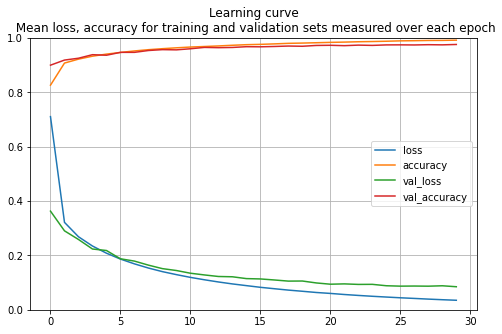

In [35]:
# Plot the learning curve
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning curve\n Mean loss, accuracy for training and validation sets measured over each epoch')
plt.show()

In [36]:
# obtain the predictions for X_test using the Neural Net #2 
test_pred_2 = np.argmax(model_2.predict(X_test), axis=-1)
test_pred_2

array([2, 0, 9, ..., 3, 9, 2])

In [37]:
# save the results to a csv
submission_df = pd.DataFrame({'ImageId':range(1,28001),'Label':test_pred_2})
submission_df.to_csv('submission_model_2.csv',index=False)

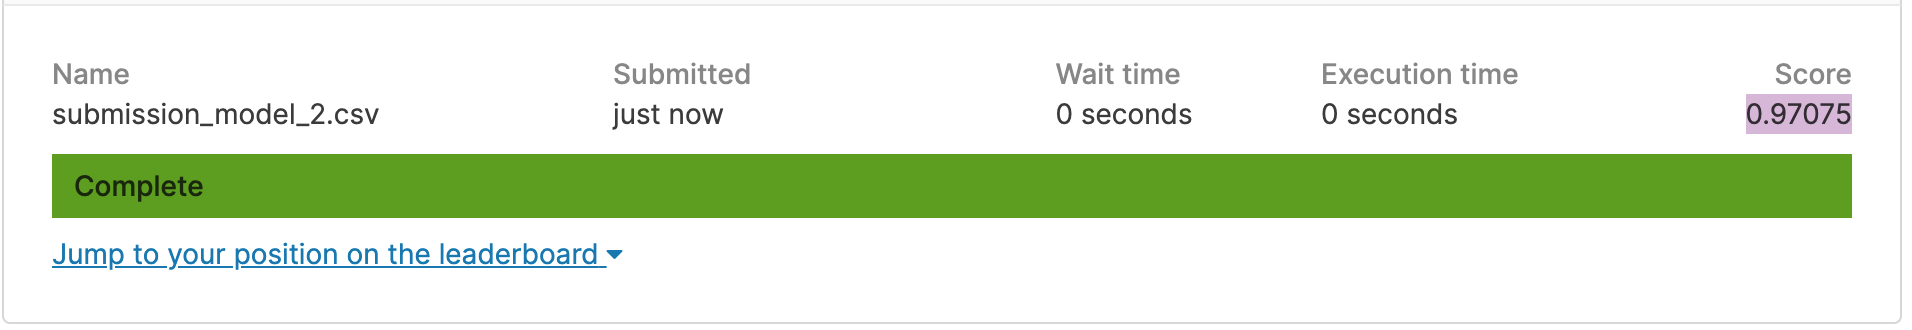

In [38]:
#Store the accuracy and kaggle score for this model 
results_tbl = results_tbl.append({'model_name':'Neural Net #2', 
                                   'Number of hidden layers (factor1)':'2',
                                   'Nodes per hidden layer (factor2)':'500',
                                   'Hidden activation function (factor3)':'relu',
                                   'Processing Time':(end-start),
                                   'Training Set Accuracy':best_model_train_accuracy,
                                   'Validation Set Accuracy':best_model_val_accuracy,
                                   'Test Set Accuracy (Kaggle score)': '0.97075'
                                   },ignore_index=True)
results_tbl

,model_name,Number of hidden layers (factor1),Nodes per hidden layer (factor2),Hidden activation function (factor3),Processing Time,Training Set Accuracy,Validation Set Accuracy,Test Set Accuracy (Kaggle score)
0,Neural Net #1,2,300,relu,00:00:45.475148,0.9903,0.9746,0.96992
1,Neural Net #2,2,500,relu,00:01:45.173467,0.9921,0.9762,0.97075


# <font color="red">_Treatment 3_</font> 

## Number of hidden layers: 2
## Number of nodes per hidden layer: 300
## Hidden Activation function: Tanh

In [39]:
#classification MLP with two hidden layers, 300 nodes per layer, "tanh" hidden layer activation
model_3 = keras.models.Sequential()
model_3.add(keras.layers.Flatten(input_shape=[28, 28]))
model_3.add(keras.layers.Dense(300, activation="tanh"))
model_3.add(keras.layers.Dense(300, activation="tanh"))
model_3.add(keras.layers.Dense(10, activation="softmax"))

In [40]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_3.layers

In [42]:
model_3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [43]:
# Fit the model; obtain the model fit time
start=datetime.now()
history_3 = model_3.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))
end=datetime.now()
print(end-start)

Epoch 1/30
1157/1157 [==============================] - 2s 2ms/step - loss: 0.6198 - accuracy: 0.8418 - val_loss: 0.3749 - val_accuracy: 0.8962
Epoch 2/30
1157/1157 [==============================] - 2s 1ms/step - loss: 0.3433 - accuracy: 0.9027 - val_loss: 0.3180 - val_accuracy: 0.9102
Epoch 3/30
1157/1157 [==============================] - 2s 1ms/step - loss: 0.3027 - accuracy: 0.9135 - val_loss: 0.2934 - val_accuracy: 0.9182
Epoch 4/30
1157/1157 [==============================] - 2s 1ms/step - loss: 0.2791 - accuracy: 0.9203 - val_loss: 0.2725 - val_accuracy: 0.9234
Epoch 5/30
1157/1157 [==============================] - 2s 2ms/step - loss: 0.2611 - accuracy: 0.9260 - val_loss: 0.2595 - val_accuracy: 0.9264
Epoch 6/30
1157/1157 [==============================] - 2s 1ms/step - loss: 0.2451 - accuracy: 0.9307 - val_loss: 0.2461 - val_accuracy: 0.9316
Epoch 7/30
1157/1157 [==============================] - 1s 1ms/step - loss: 0.2311 - accuracy: 0.9346 - val_loss: 0.2387 - val_accuracy:

In [44]:
print ('Train Accuracy: ')
best_model_train_accuracy = np.round(history_3.history['accuracy'][np.argmin(history_3.history['loss'])],4)
best_model_train_accuracy

Train Accuracy: 


0.9782

In [45]:
print ('Validation Accuracy: ')
best_model_val_accuracy = np.round(history_3.history['val_accuracy'][np.argmin(history_3.history['val_loss'])],4)
best_model_val_accuracy

Validation Accuracy: 


0.9658

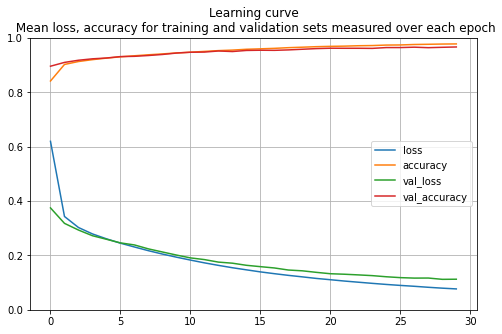

In [46]:
# Plot the learning curve
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning curve\n Mean loss, accuracy for training and validation sets measured over each epoch')
plt.show()

In [47]:
# obtain the predictions for X_test using the Neural Net #3 
test_pred_3 = np.argmax(model_3.predict(X_test), axis=-1)
test_pred_3

array([2, 0, 9, ..., 3, 9, 2])

In [48]:
# save the results to a csv
submission_df = pd.DataFrame({'ImageId':range(1,28001),'Label':test_pred_3})
submission_df.to_csv('submission_model_3.csv',index=False)

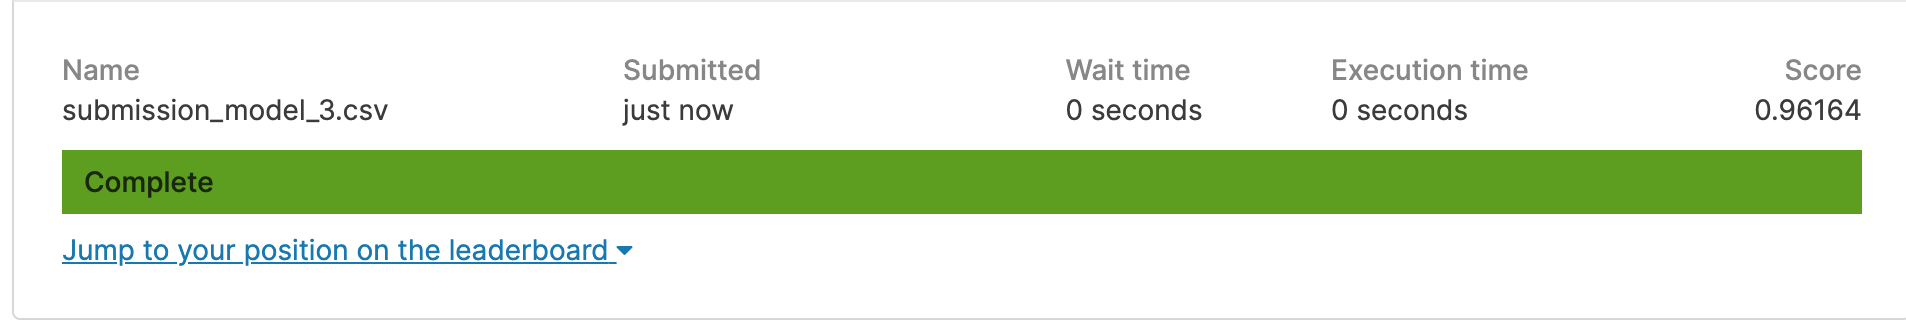

In [49]:
#Store the accuracy and kaggle score for this model 
results_tbl = results_tbl.append({'model_name':'Neural Net #3', 
                                   'Number of hidden layers (factor1)':'2',
                                   'Nodes per hidden layer (factor2)':'300',
                                   'Hidden activation function (factor3)':'tanh',
                                   'Processing Time':(end-start),
                                   'Training Set Accuracy':best_model_train_accuracy,
                                   'Validation Set Accuracy':best_model_val_accuracy,
                                   'Test Set Accuracy (Kaggle score)': '0.96164'
                                   },ignore_index=True)
results_tbl


,model_name,Number of hidden layers (factor1),Nodes per hidden layer (factor2),Hidden activation function (factor3),Processing Time,Training Set Accuracy,Validation Set Accuracy,Test Set Accuracy (Kaggle score)
0,Neural Net #1,2,300,relu,00:00:45.475148,0.9903,0.9746,0.96992
1,Neural Net #2,2,500,relu,00:01:45.173467,0.9921,0.9762,0.97075
2,Neural Net #3,2,300,tanh,00:00:46.942567,0.9782,0.9658,0.96164


# <font color="red">_Treatment 4_</font> 

## Number of hidden layers: 2
## Number of nodes per hidden layer: 500
## Hidden Activation function: Tanh

In [50]:
#classification MLP with two hidden layers, 500 nodes per layer, "tanh" hidden layer activation
model_4 = keras.models.Sequential()
model_4.add(keras.layers.Flatten(input_shape=[28, 28]))
model_4.add(keras.layers.Dense(500, activation="tanh"))
model_4.add(keras.layers.Dense(500, activation="tanh"))
model_4.add(keras.layers.Dense(10, activation="softmax"))

In [51]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_4.layers

In [53]:
model_4.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [54]:
# Fit the model; obtain the model fit time
start=datetime.now()
history_4 = model_4.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))
end=datetime.now()
print(end-start)

Epoch 1/30
1157/1157 [==============================] - 3s 3ms/step - loss: 0.5699 - accuracy: 0.8548 - val_loss: 0.3603 - val_accuracy: 0.8996
Epoch 2/30
1157/1157 [==============================] - 3s 3ms/step - loss: 0.3342 - accuracy: 0.9060 - val_loss: 0.3128 - val_accuracy: 0.9084
Epoch 3/30
1157/1157 [==============================] - 3s 3ms/step - loss: 0.2997 - accuracy: 0.9142 - val_loss: 0.2934 - val_accuracy: 0.9174
Epoch 4/30
1157/1157 [==============================] - 4s 3ms/step - loss: 0.2792 - accuracy: 0.9206 - val_loss: 0.2745 - val_accuracy: 0.9240
Epoch 5/30
1157/1157 [==============================] - 3s 3ms/step - loss: 0.2635 - accuracy: 0.9248 - val_loss: 0.2639 - val_accuracy: 0.9244
Epoch 6/30
1157/1157 [==============================] - 3s 3ms/step - loss: 0.2493 - accuracy: 0.9290 - val_loss: 0.2519 - val_accuracy: 0.9292
Epoch 7/30
1157/1157 [==============================] - 3s 3ms/step - loss: 0.2367 - accuracy: 0.9324 - val_loss: 0.2475 - val_accuracy:

In [55]:
print ('Train Accuracy: ')
best_model_train_accuracy = np.round(history_4.history['accuracy'][np.argmin(history_4.history['loss'])],4)
best_model_train_accuracy


Train Accuracy: 


0.9775

In [56]:
print ('Validation Accuracy: ')
best_model_val_accuracy = np.round(history_4.history['val_accuracy'][np.argmin(history_4.history['val_loss'])],4)
best_model_val_accuracy

Validation Accuracy: 


0.9666

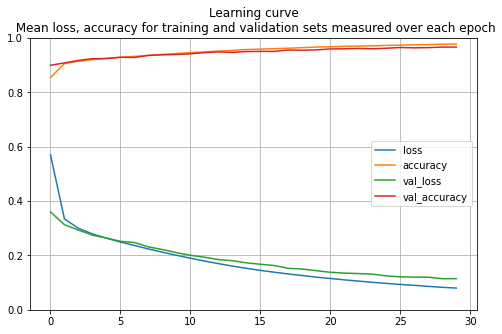

In [57]:
# Plot the learning curve
pd.DataFrame(history_4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning curve\n Mean loss, accuracy for training and validation sets measured over each epoch')
plt.show()

In [58]:
# obtain the predictions for X_test using the Neural Net #4 
test_pred_4 = np.argmax(model_4.predict(X_test), axis=-1)
test_pred_4

array([2, 0, 9, ..., 3, 9, 2])

In [59]:
# save the results to a csv
submission_df = pd.DataFrame({'ImageId':range(1,28001),'Label':test_pred_4})
submission_df.to_csv('submission_model_4.csv',index=False)

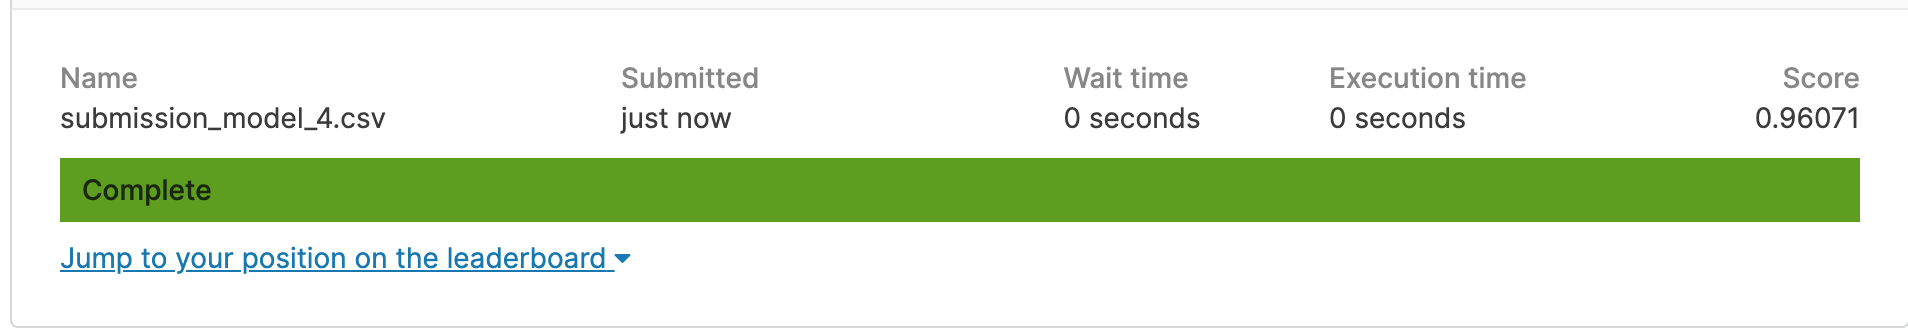

In [60]:
#Store the accuracy and kaggle score for this model 
results_tbl = results_tbl.append({'model_name':'Neural Net #4', 
                                   'Number of hidden layers (factor1)':'2',
                                   'Nodes per hidden layer (factor2)':'500',
                                   'Hidden activation function (factor3)':'tanh',
                                   'Processing Time':(end-start),
                                   'Training Set Accuracy':best_model_train_accuracy,
                                   'Validation Set Accuracy':best_model_val_accuracy,
                                   'Test Set Accuracy (Kaggle score)': '0.96071'
                                   },ignore_index=True)
results_tbl

,model_name,Number of hidden layers (factor1),Nodes per hidden layer (factor2),Hidden activation function (factor3),Processing Time,Training Set Accuracy,Validation Set Accuracy,Test Set Accuracy (Kaggle score)
0,Neural Net #1,2,300,relu,00:00:45.475148,0.9903,0.9746,0.96992
1,Neural Net #2,2,500,relu,00:01:45.173467,0.9921,0.9762,0.97075
2,Neural Net #3,2,300,tanh,00:00:46.942567,0.9782,0.9658,0.96164
3,Neural Net #4,2,500,tanh,00:01:42.917105,0.9775,0.9666,0.96071


# <font color="red">_Treatment 5_</font> 

## Number of hidden layers: 5
## Number of nodes per hidden layer: 300
## Hidden Activation function: ReLu

In [61]:
#classification MLP with five hidden layers, 300 nodes per layer, "relu" hidden layer activation
model_5 = keras.models.Sequential()
model_5.add(keras.layers.Flatten(input_shape=[28, 28]))
model_5.add(keras.layers.Dense(300, activation="relu"))
model_5.add(keras.layers.Dense(300, activation="relu"))
model_5.add(keras.layers.Dense(300, activation="relu"))
model_5.add(keras.layers.Dense(300, activation="relu"))
model_5.add(keras.layers.Dense(300, activation="relu"))
model_5.add(keras.layers.Dense(10, activation="softmax"))


In [62]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_14 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_15 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_16 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [63]:
model_5.layers

In [64]:
model_5.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [65]:
# Fit the model; obtain the model fit time
start=datetime.now()
history_5 = model_5.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))
end=datetime.now()
print(end-start)

Epoch 1/30
1157/1157 [==============================] - 3s 2ms/step - loss: 0.8627 - accuracy: 0.7629 - val_loss: 0.3981 - val_accuracy: 0.8752
Epoch 2/30
1157/1157 [==============================] - 2s 2ms/step - loss: 0.2782 - accuracy: 0.9160 - val_loss: 0.3005 - val_accuracy: 0.9066
Epoch 3/30
1157/1157 [==============================] - 2s 2ms/step - loss: 0.2076 - accuracy: 0.9384 - val_loss: 0.2752 - val_accuracy: 0.9164
Epoch 4/30
1157/1157 [==============================] - 2s 2ms/step - loss: 0.1653 - accuracy: 0.9510 - val_loss: 0.1658 - val_accuracy: 0.9518
Epoch 5/30
1157/1157 [==============================] - 3s 2ms/step - loss: 0.1362 - accuracy: 0.9595 - val_loss: 0.2158 - val_accuracy: 0.9338
Epoch 6/30
1157/1157 [==============================] - 2s 2ms/step - loss: 0.1135 - accuracy: 0.9662 - val_loss: 0.1332 - val_accuracy: 0.9624
Epoch 7/30
1157/1157 [==============================] - 2s 2ms/step - loss: 0.0973 - accuracy: 0.9709 - val_loss: 0.1252 - val_accuracy:

In [66]:
print ('Train Accuracy: ')
best_model_train_accuracy = np.round(history_5.history['accuracy'][np.argmin(history_5.history['loss'])],4)
best_model_train_accuracy


Train Accuracy: 


1.0

In [67]:
print ('Validation Accuracy: ')
best_model_val_accuracy = np.round(history_5.history['val_accuracy'][np.argmin(history_5.history['val_loss'])],4)
best_model_val_accuracy

Validation Accuracy: 


0.9762

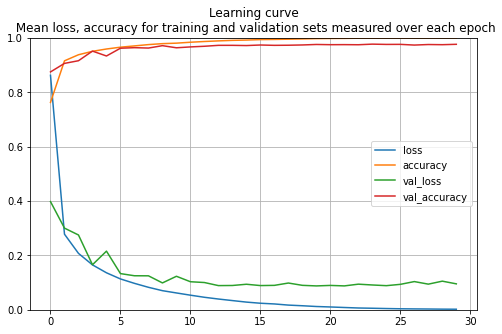

In [68]:
# Plot the learning curve
pd.DataFrame(history_5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning curve\n Mean loss, accuracy for training and validation sets measured over each epoch')
plt.show()

In [69]:
# obtain the predictions for X_test using the Neural Net #5 
test_pred_5 = np.argmax(model_5.predict(X_test), axis=-1)
test_pred_5


array([2, 0, 9, ..., 3, 9, 2])

In [70]:
# save the results to a csv
submission_df = pd.DataFrame({'ImageId':range(1,28001),'Label':test_pred_5})
submission_df.to_csv('submission_model_5.csv',index=False)


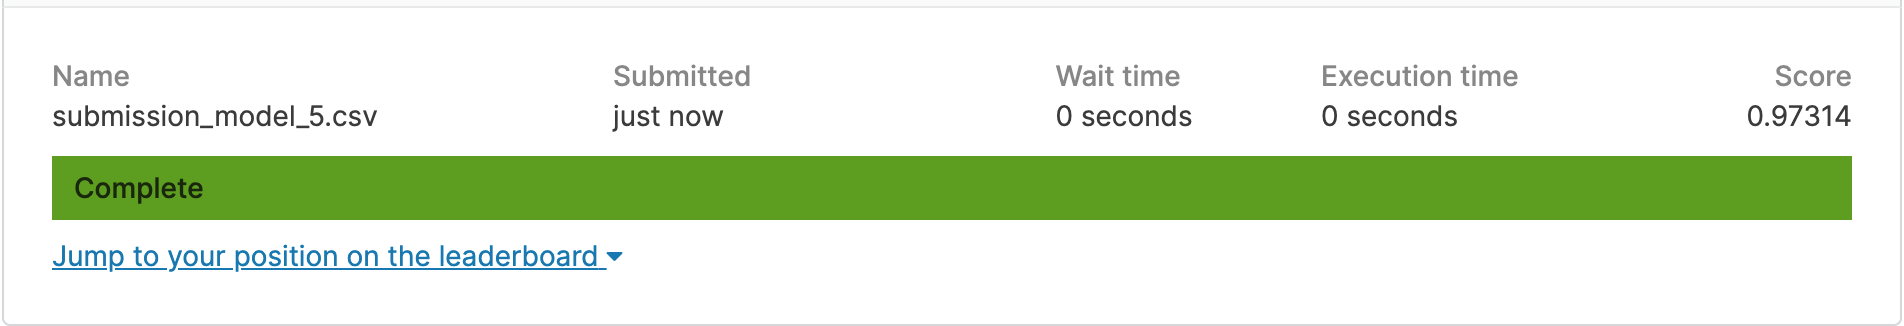

In [71]:
#Store the accuracy and kaggle score for this model 
results_tbl = results_tbl.append({'model_name':'Neural Net #5', 
                                   'Number of hidden layers (factor1)':'5',
                                   'Nodes per hidden layer (factor2)':'300',
                                   'Hidden activation function (factor3)':'relu',
                                   'Processing Time':(end-start),
                                   'Training Set Accuracy':best_model_train_accuracy,
                                   'Validation Set Accuracy':best_model_val_accuracy,
                                   'Test Set Accuracy (Kaggle score)': '0.97314'
                                   },ignore_index=True)
results_tbl

,model_name,Number of hidden layers (factor1),Nodes per hidden layer (factor2),Hidden activation function (factor3),Processing Time,Training Set Accuracy,Validation Set Accuracy,Test Set Accuracy (Kaggle score)
0,Neural Net #1,2,300,relu,00:00:45.475148,0.9903,0.9746,0.96992
1,Neural Net #2,2,500,relu,00:01:45.173467,0.9921,0.9762,0.97075
2,Neural Net #3,2,300,tanh,00:00:46.942567,0.9782,0.9658,0.96164
3,Neural Net #4,2,500,tanh,00:01:42.917105,0.9775,0.9666,0.96071
4,Neural Net #5,5,300,relu,00:01:12.489494,1.0000,0.9762,0.97314


# <font color="red">_Treatment 6_</font> 

## Number of hidden layers: 5
## Number of nodes per hidden layer: 500
## Hidden Activation function: ReLu

In [72]:
#classification MLP with five hidden layers, 500 nodes per layer, "relu" hidden layer activation
model_6 = keras.models.Sequential()
model_6.add(keras.layers.Flatten(input_shape=[28, 28]))
model_6.add(keras.layers.Dense(500, activation="relu"))
model_6.add(keras.layers.Dense(500, activation="relu"))
model_6.add(keras.layers.Dense(500, activation="relu"))
model_6.add(keras.layers.Dense(500, activation="relu"))
model_6.add(keras.layers.Dense(500, activation="relu"))
model_6.add(keras.layers.Dense(10, activation="softmax"))


In [73]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_19 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_20 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_21 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_22 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_23 (Dense)             (None, 10)               

In [74]:
model_6.layers

In [75]:
model_6.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [76]:
# Fit the model; obtain the model fit time
start=datetime.now()
history_6 = model_6.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))
end=datetime.now()
print(end-start)

Epoch 1/30
1157/1157 [==============================] - 6s 5ms/step - loss: 0.8072 - accuracy: 0.7821 - val_loss: 0.4515 - val_accuracy: 0.8502
Epoch 2/30
1157/1157 [==============================] - 6s 5ms/step - loss: 0.2635 - accuracy: 0.9225 - val_loss: 0.3148 - val_accuracy: 0.9028
Epoch 3/30
1157/1157 [==============================] - 6s 5ms/step - loss: 0.1959 - accuracy: 0.9424 - val_loss: 0.3222 - val_accuracy: 0.9088
Epoch 4/30
1157/1157 [==============================] - 6s 5ms/step - loss: 0.1555 - accuracy: 0.9551 - val_loss: 0.1595 - val_accuracy: 0.9532
Epoch 5/30
1157/1157 [==============================] - 6s 5ms/step - loss: 0.1276 - accuracy: 0.9618 - val_loss: 0.4957 - val_accuracy: 0.8640
Epoch 6/30
1157/1157 [==============================] - 6s 5ms/step - loss: 0.1058 - accuracy: 0.9682 - val_loss: 0.1280 - val_accuracy: 0.9636
Epoch 7/30
1157/1157 [==============================] - 6s 5ms/step - loss: 0.0899 - accuracy: 0.9727 - val_loss: 0.1193 - val_accuracy:

In [77]:
print ('Train Accuracy: ')
best_model_train_accuracy = np.round(history_6.history['accuracy'][np.argmin(history_6.history['loss'])],4)
best_model_train_accuracy


Train Accuracy: 


1.0

In [78]:
print ('Validation Accuracy: ')
best_model_val_accuracy = np.round(history_6.history['val_accuracy'][np.argmin(history_6.history['val_loss'])],4)
best_model_val_accuracy


Validation Accuracy: 


0.9732

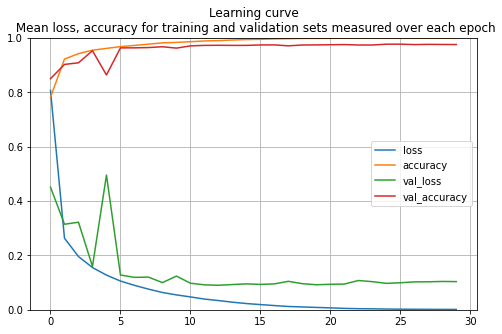

In [79]:
# Plot the learning curve
pd.DataFrame(history_6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning curve\n Mean loss, accuracy for training and validation sets measured over each epoch')
plt.show()


In [80]:
# obtain the predictions for X_test using the Neural Net #6 
test_pred_6 = np.argmax(model_6.predict(X_test), axis=-1)
test_pred_6

array([2, 0, 9, ..., 3, 9, 2])

In [81]:
# save the results to a csv
submission_df = pd.DataFrame({'ImageId':range(1,28001),'Label':test_pred_6})
submission_df.to_csv('submission_model_6.csv',index=False)

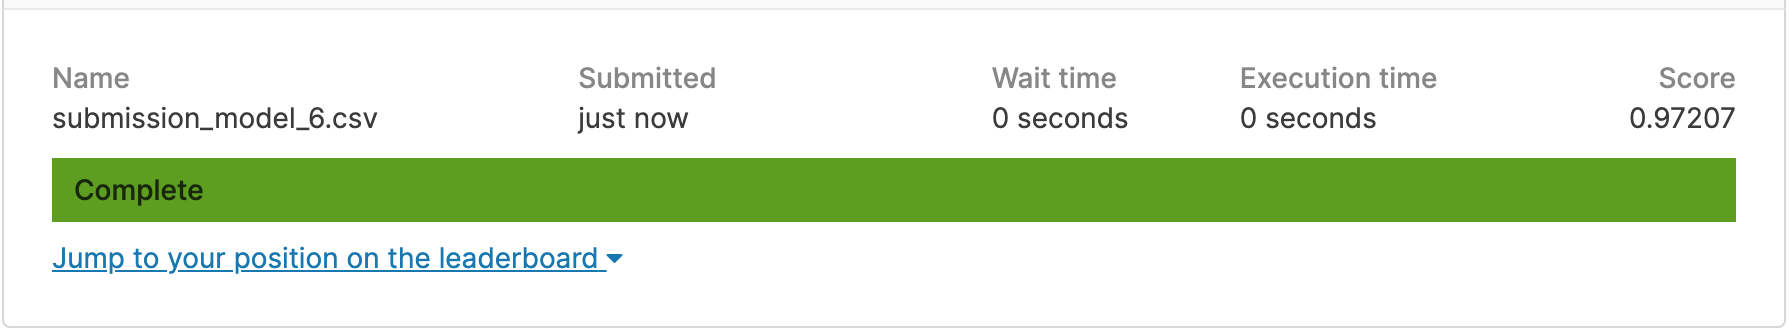

In [82]:
#Store the accuracy and kaggle score for this model 
results_tbl = results_tbl.append({'model_name':'Neural Net #6', 
                                   'Number of hidden layers (factor1)':'5',
                                   'Nodes per hidden layer (factor2)':'500',
                                   'Hidden activation function (factor3)':'relu',
                                   'Processing Time':(end-start),
                                   'Training Set Accuracy':best_model_train_accuracy,
                                   'Validation Set Accuracy':best_model_val_accuracy,
                                   'Test Set Accuracy (Kaggle score)': '0.97207'
                                   },ignore_index=True)
results_tbl

,model_name,Number of hidden layers (factor1),Nodes per hidden layer (factor2),Hidden activation function (factor3),Processing Time,Training Set Accuracy,Validation Set Accuracy,Test Set Accuracy (Kaggle score)
0,Neural Net #1,2,300,relu,00:00:45.475148,0.9903,0.9746,0.96992
1,Neural Net #2,2,500,relu,00:01:45.173467,0.9921,0.9762,0.97075
2,Neural Net #3,2,300,tanh,00:00:46.942567,0.9782,0.9658,0.96164
3,Neural Net #4,2,500,tanh,00:01:42.917105,0.9775,0.9666,0.96071
4,Neural Net #5,5,300,relu,00:01:12.489494,1.0000,0.9762,0.97314
5,Neural Net #6,5,500,relu,00:03:04.337008,1.0000,0.9732,0.97207


# <font color="red">_Treatment 7_</font> 
 
## Number of hidden layers: 5
## Number of nodes per hidden layer: 300
## Hidden Activation function: Tanh

In [83]:
#classification MLP with five hidden layers, 300 nodes per layer, "tanh" hidden layer activation
model_7 = keras.models.Sequential()
model_7.add(keras.layers.Flatten(input_shape=[28, 28]))
model_7.add(keras.layers.Dense(300, activation="tanh"))
model_7.add(keras.layers.Dense(300, activation="tanh"))
model_7.add(keras.layers.Dense(300, activation="tanh"))
model_7.add(keras.layers.Dense(300, activation="tanh"))
model_7.add(keras.layers.Dense(300, activation="tanh"))
model_7.add(keras.layers.Dense(10, activation="softmax"))

In [84]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_25 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_26 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_27 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_28 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_29 (Dense)             (None, 10)               

In [85]:
model_7.layers

In [86]:
model_7.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [87]:
# Fit the model; obtain the model fit time
start=datetime.now()
history_7 = model_7.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))
end=datetime.now()
print(end-start)

Epoch 1/30
1157/1157 [==============================] - 3s 2ms/step - loss: 0.5160 - accuracy: 0.8594 - val_loss: 0.3242 - val_accuracy: 0.9058
Epoch 2/30
1157/1157 [==============================] - 2s 2ms/step - loss: 0.2916 - accuracy: 0.9148 - val_loss: 0.2739 - val_accuracy: 0.9210
Epoch 3/30
1157/1157 [==============================] - 2s 2ms/step - loss: 0.2498 - accuracy: 0.9265 - val_loss: 0.2540 - val_accuracy: 0.9252
Epoch 4/30
1157/1157 [==============================] - 2s 2ms/step - loss: 0.2195 - accuracy: 0.9359 - val_loss: 0.2162 - val_accuracy: 0.9366
Epoch 5/30
1157/1157 [==============================] - 3s 2ms/step - loss: 0.1930 - accuracy: 0.9436 - val_loss: 0.2085 - val_accuracy: 0.9368
Epoch 6/30
1157/1157 [==============================] - 2s 2ms/step - loss: 0.1699 - accuracy: 0.9498 - val_loss: 0.1748 - val_accuracy: 0.9494
Epoch 7/30
1157/1157 [==============================] - 2s 2ms/step - loss: 0.1516 - accuracy: 0.9554 - val_loss: 0.1697 - val_accuracy:

In [88]:
print ('Train Accuracy: ')
best_model_train_accuracy = np.round(history_7.history['accuracy'][np.argmin(history_7.history['loss'])],4)
best_model_train_accuracy

Train Accuracy: 


0.9955

In [89]:
print ('Validation Accuracy: ')
best_model_val_accuracy = np.round(history_7.history['val_accuracy'][np.argmin(history_7.history['val_loss'])],4)
best_model_val_accuracy

Validation Accuracy: 


0.9726

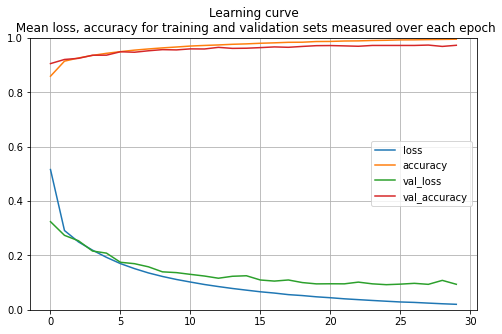

In [90]:
pd.DataFrame(history_7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning curve\n Mean loss, accuracy for training and validation sets measured over each epoch')
plt.show()


In [91]:
# obtain the predictions for X_test using the Neural Net #7 
test_pred_7 = np.argmax(model_7.predict(X_test), axis=-1)
test_pred_7

array([2, 0, 9, ..., 3, 9, 2])

In [92]:
# save the results to a csv
submission_df = pd.DataFrame({'ImageId':range(1,28001),'Label':test_pred_7})
submission_df.to_csv('submission_model_7.csv',index=False)

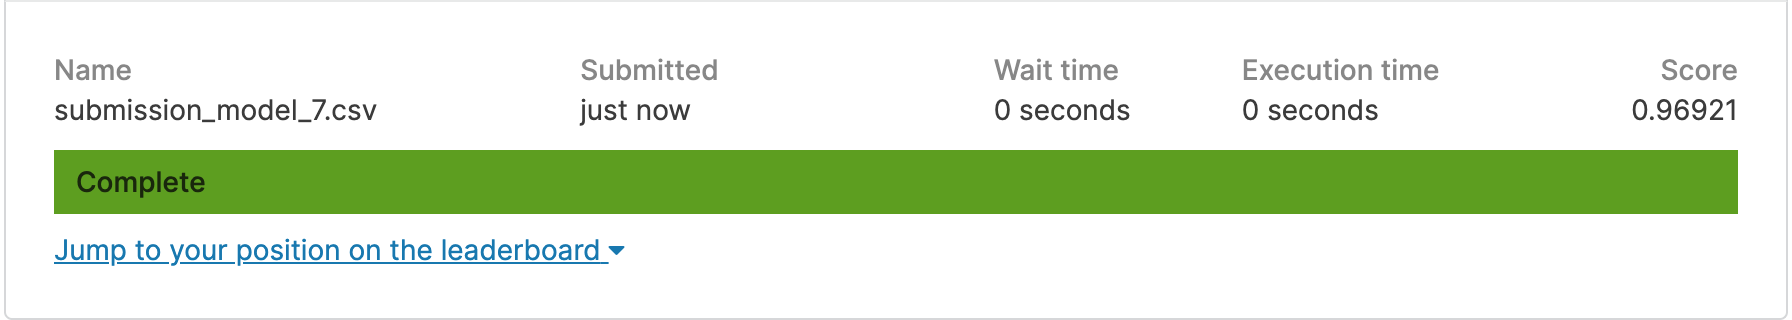

In [93]:
#Store the accuracy and kaggle score for this model 
results_tbl = results_tbl.append({'model_name':'Neural Net #7', 
                                   'Number of hidden layers (factor1)':'5',
                                   'Nodes per hidden layer (factor2)':'300',
                                   'Hidden activation function (factor3)':'tanh',
                                   'Processing Time':(end-start),
                                   'Training Set Accuracy':best_model_train_accuracy,
                                   'Validation Set Accuracy':best_model_val_accuracy,
                                   'Test Set Accuracy (Kaggle score)': '0.96921'
                                   },ignore_index=True)
results_tbl

,model_name,Number of hidden layers (factor1),Nodes per hidden layer (factor2),Hidden activation function (factor3),Processing Time,Training Set Accuracy,Validation Set Accuracy,Test Set Accuracy (Kaggle score)
0,Neural Net #1,2,300,relu,00:00:45.475148,0.9903,0.9746,0.96992
1,Neural Net #2,2,500,relu,00:01:45.173467,0.9921,0.9762,0.97075
2,Neural Net #3,2,300,tanh,00:00:46.942567,0.9782,0.9658,0.96164
3,Neural Net #4,2,500,tanh,00:01:42.917105,0.9775,0.9666,0.96071
4,Neural Net #5,5,300,relu,00:01:12.489494,1.0000,0.9762,0.97314
5,Neural Net #6,5,500,relu,00:03:04.337008,1.0000,0.9732,0.97207
6,Neural Net #7,5,300,tanh,00:01:12.212947,0.9955,0.9726,0.96921


# <font color="red">_Treatment 4_</font> 

## Number of hidden layers: 5
## Number of nodes per hidden layer: 500
## Hidden Activation function: Tanh

In [94]:
#classification MLP with five hidden layers, 500 nodes per layer, "tanh" hidden layer activation
model_8 = keras.models.Sequential()
model_8.add(keras.layers.Flatten(input_shape=[28, 28]))
model_8.add(keras.layers.Dense(500, activation="tanh"))
model_8.add(keras.layers.Dense(500, activation="tanh"))
model_8.add(keras.layers.Dense(500, activation="tanh"))
model_8.add(keras.layers.Dense(500, activation="tanh"))
model_8.add(keras.layers.Dense(500, activation="tanh"))
model_8.add(keras.layers.Dense(10, activation="softmax"))

In [95]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_31 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_32 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_33 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_34 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_35 (Dense)             (None, 10)               

In [96]:
model_8.layers

In [97]:
model_8.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [98]:
# Fit the model; obtain the model fit time
start=datetime.now()
history_8 = model_8.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))
end=datetime.now()
print(end-start)

Epoch 1/30
1157/1157 [==============================] - 7s 6ms/step - loss: 0.4756 - accuracy: 0.8706 - val_loss: 0.3106 - val_accuracy: 0.9132
Epoch 2/30
1157/1157 [==============================] - 7s 6ms/step - loss: 0.2853 - accuracy: 0.9172 - val_loss: 0.2720 - val_accuracy: 0.9206
Epoch 3/30
1157/1157 [==============================] - 7s 6ms/step - loss: 0.2456 - accuracy: 0.9285 - val_loss: 0.2524 - val_accuracy: 0.9236
Epoch 4/30
1157/1157 [==============================] - 7s 6ms/step - loss: 0.2157 - accuracy: 0.9371 - val_loss: 0.2097 - val_accuracy: 0.9386
Epoch 5/30
1157/1157 [==============================] - 7s 6ms/step - loss: 0.1893 - accuracy: 0.9445 - val_loss: 0.2069 - val_accuracy: 0.9352
Epoch 6/30
1157/1157 [==============================] - 7s 6ms/step - loss: 0.1660 - accuracy: 0.9509 - val_loss: 0.1690 - val_accuracy: 0.9502
Epoch 7/30
1157/1157 [==============================] - 7s 6ms/step - loss: 0.1473 - accuracy: 0.9567 - val_loss: 0.1698 - val_accuracy:

In [99]:

print ('Train Accuracy: ')
best_model_train_accuracy = np.round(history_8.history['accuracy'][np.argmin(history_8.history['loss'])],4)
best_model_train_accuracy

Train Accuracy: 


0.996

In [100]:
print ('Validation Accuracy: ')
best_model_val_accuracy = np.round(history_8.history['val_accuracy'][np.argmin(history_8.history['val_loss'])],4)
best_model_val_accuracy

Validation Accuracy: 


0.9784

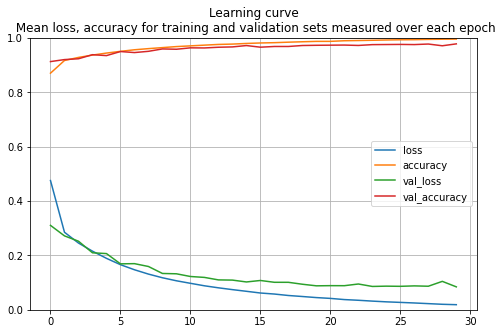

In [101]:
# Plot the learning curve
pd.DataFrame(history_8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning curve\n Mean loss, accuracy for training and validation sets measured over each epoch')
plt.show()


In [102]:
# obtain the predictions for X_test using the Neural Net #8 
test_pred_8 = np.argmax(model_8.predict(X_test), axis=-1)
test_pred_8

array([2, 0, 9, ..., 3, 9, 2])

In [103]:
# save the results to a csv
submission_df = pd.DataFrame({'ImageId':range(1,28001),'Label':test_pred_8})
submission_df.to_csv('submission_model_8.csv',index=False)

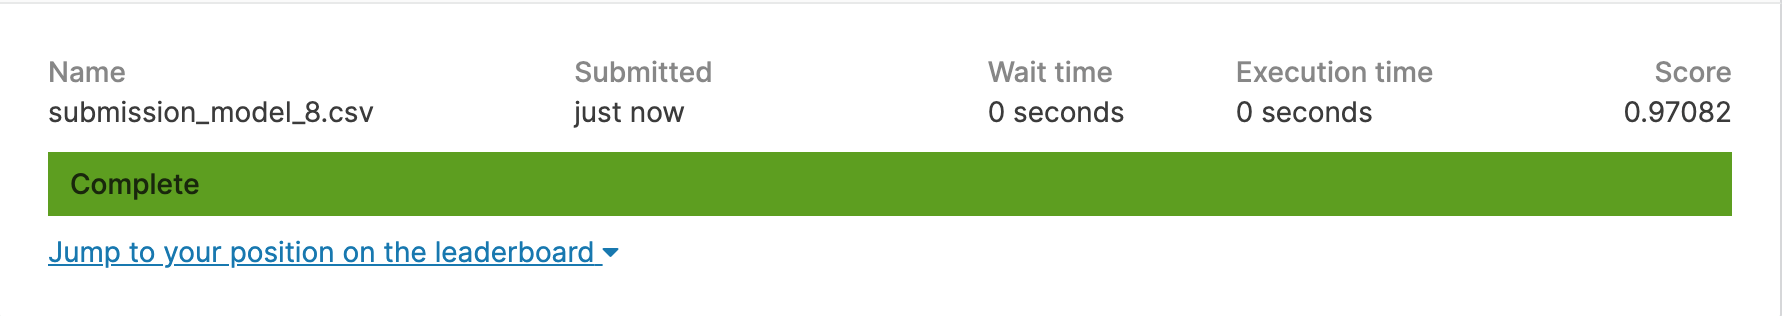

In [104]:
#Store the accuracy and kaggle score for this model 
results_tbl = results_tbl.append({'model_name':'Neural Net #8', 
                                   'Number of hidden layers (factor1)':'5',
                                   'Nodes per hidden layer (factor2)':'500',
                                   'Hidden activation function (factor3)':'tanh',
                                   'Processing Time':(end-start),
                                   'Training Set Accuracy':best_model_train_accuracy,
                                   'Validation Set Accuracy':best_model_val_accuracy,
                                   'Test Set Accuracy (Kaggle score)': '0.97082'
                                   },ignore_index=True)
results_tbl

,model_name,Number of hidden layers (factor1),Nodes per hidden layer (factor2),Hidden activation function (factor3),Processing Time,Training Set Accuracy,Validation Set Accuracy,Test Set Accuracy (Kaggle score)
0,Neural Net #1,2,300,relu,00:00:45.475148,0.9903,0.9746,0.96992
1,Neural Net #2,2,500,relu,00:01:45.173467,0.9921,0.9762,0.97075
2,Neural Net #3,2,300,tanh,00:00:46.942567,0.9782,0.9658,0.96164
3,Neural Net #4,2,500,tanh,00:01:42.917105,0.9775,0.9666,0.96071
4,Neural Net #5,5,300,relu,00:01:12.489494,1.0000,0.9762,0.97314
5,Neural Net #6,5,500,relu,00:03:04.337008,1.0000,0.9732,0.97207
6,Neural Net #7,5,300,tanh,00:01:12.212947,0.9955,0.9726,0.96921
7,Neural Net #8,5,500,tanh,00:03:40.280897,0.9960,0.9784,0.97082
